# 2准备

## 2.1实验环境搭建

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
import seaborn as sns
import re

## 2.2数据准备
## 2.3数据读入

In [4]:
dataset = pd.read_csv("D:/input/LoanStats_securev1_2019Q3.csv", encoding="gbk", low_memory=False)

In [5]:
dataset.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,158303403,NaN,12000,12000,12000,36 months,8.19%,377.09,A,A4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,158628181,NaN,20000,20000,20000,36 months,8.81%,634.23,A,A5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,159231951,NaN,18000,18000,18000,60 months,13.08%,410.30,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,159289397,NaN,10000,10000,10000,36 months,10.33%,324.23,B,B1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,159296485,NaN,7000,7000,7000,36 months,18.62%,255.25,D,D1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dataset.shape

(143035, 150)

# 3缺失值处理
## 3.1缺失值查看


In [7]:
dataset.isnull().head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,False,True,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,True,True
1,False,True,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,True,True
2,False,True,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,True,True
3,False,True,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,True,True
4,False,True,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,True,True
5,False,True,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,True,True
6,False,True,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,True,True
7,False,True,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,True,True
8,False,True,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,True,True
9,False,True,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,True,True


In [16]:
na_ratio = pd.DataFrame(dataset.isnull().sum() / len(dataset) * 100, columns=['NA_Ratio'])

In [13]:
na_ratio.head(10)

,NA-Ratio
id,0.0
member_id,100.0
loan_amnt,0.0
funded_amnt,0.0
funded_amnt_inv,0.0
term,0.0
int_rate,0.0
installment,0.0
grade,0.0
sub_grade,0.0


In [20]:
df_na = na_ratio[na_ratio['NA_Ratio'] >= 90].sort_values(by='NA_Ratio', ascending=False)

In [21]:
df_na

,NA_Ratio
member_id,100.000000
hardship_dpd,100.000000
settlement_percentage,100.000000
settlement_amount,100.000000
settlement_date,100.000000
settlement_status,100.000000
debt_settlement_flag_date,100.000000
hardship_last_payment_amount,100.000000
hardship_payoff_balance_amount,100.000000
orig_projected_additional_accrued_interest,100.000000


In [22]:
df_na1 = na_ratio[na_ratio['NA_Ratio'] >= 90].sort_values(by='NA_Ratio', ascending=True)

In [23]:
df_na1

,NA_Ratio
sec_app_mths_since_last_major_derog,95.762576
member_id,100.000000
settlement_amount,100.000000
settlement_date,100.000000
settlement_status,100.000000
debt_settlement_flag_date,100.000000
hardship_last_payment_amount,100.000000
hardship_payoff_balance_amount,100.000000
orig_projected_additional_accrued_interest,100.000000
hardship_loan_status,100.000000


In [24]:
df_na2 = na_ratio[na_ratio['NA_Ratio'] >= 85].sort_values(by='NA_Ratio', ascending=True)

In [25]:
df_na2

,NA_Ratio
sec_app_inq_last_6mths,86.159332
sec_app_collections_12_mths_ex_med,86.159332
sec_app_chargeoff_within_12_mths,86.159332
annual_inc_joint,86.159332
dti_joint,86.159332
sec_app_num_rev_accts,86.159332
revol_bal_joint,86.159332
sec_app_fico_range_low,86.159332
sec_app_fico_range_high,86.159332
sec_app_earliest_cr_line,86.159332


In [27]:
df_na.to_csv("D:/output/df_na.csv",index=False)

In [28]:
df_na = na_ratio[(na_ratio['NA_Ratio'] < 80) & (na_ratio['NA_Ratio'] >= 0.01)].sort_values(by='NA_Ratio', ascending=False)

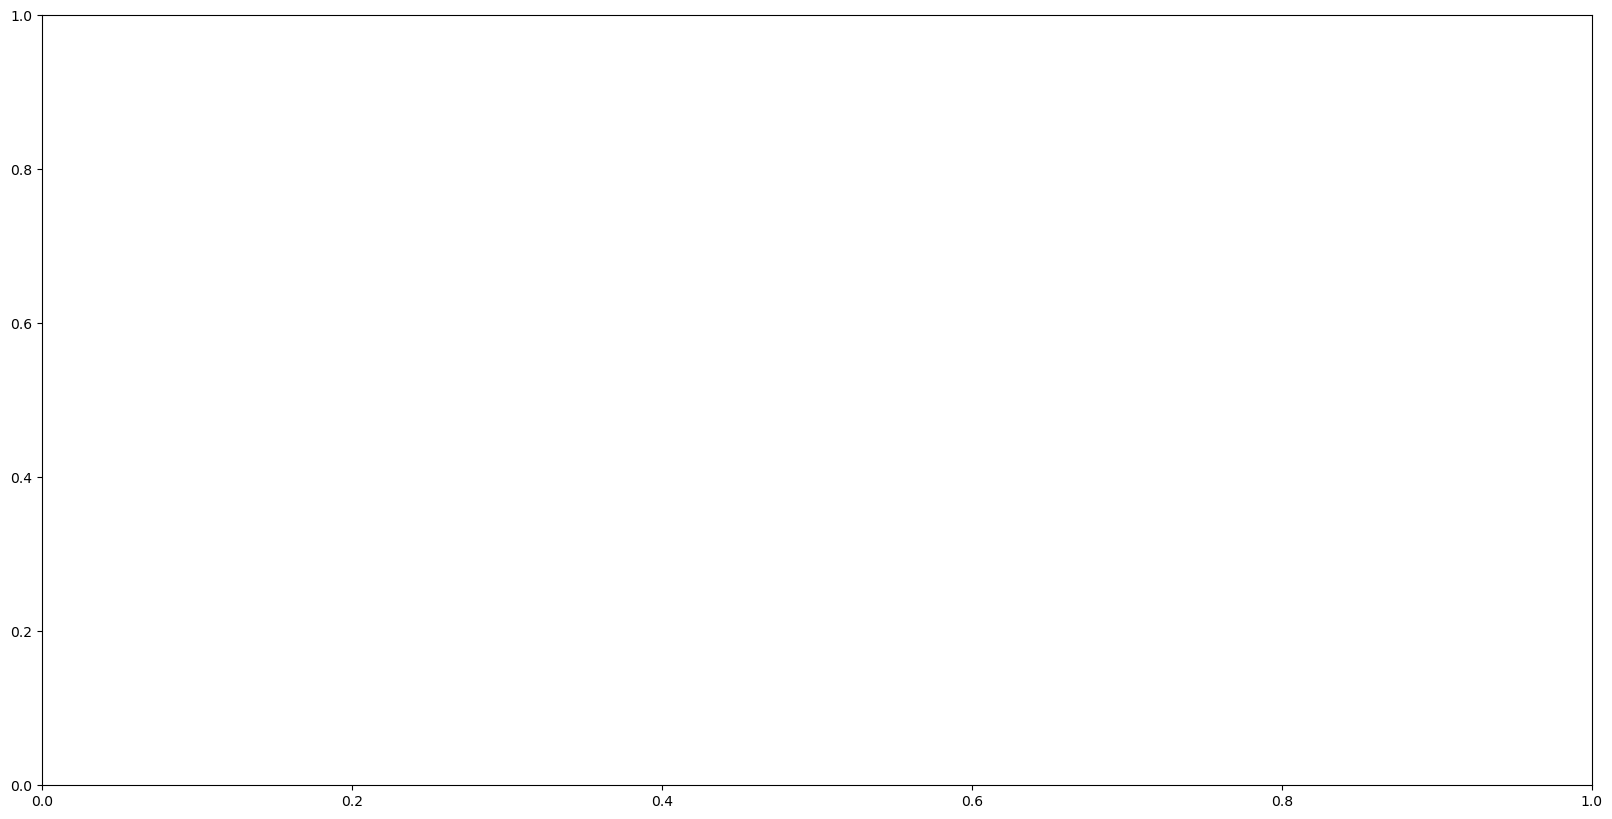

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))

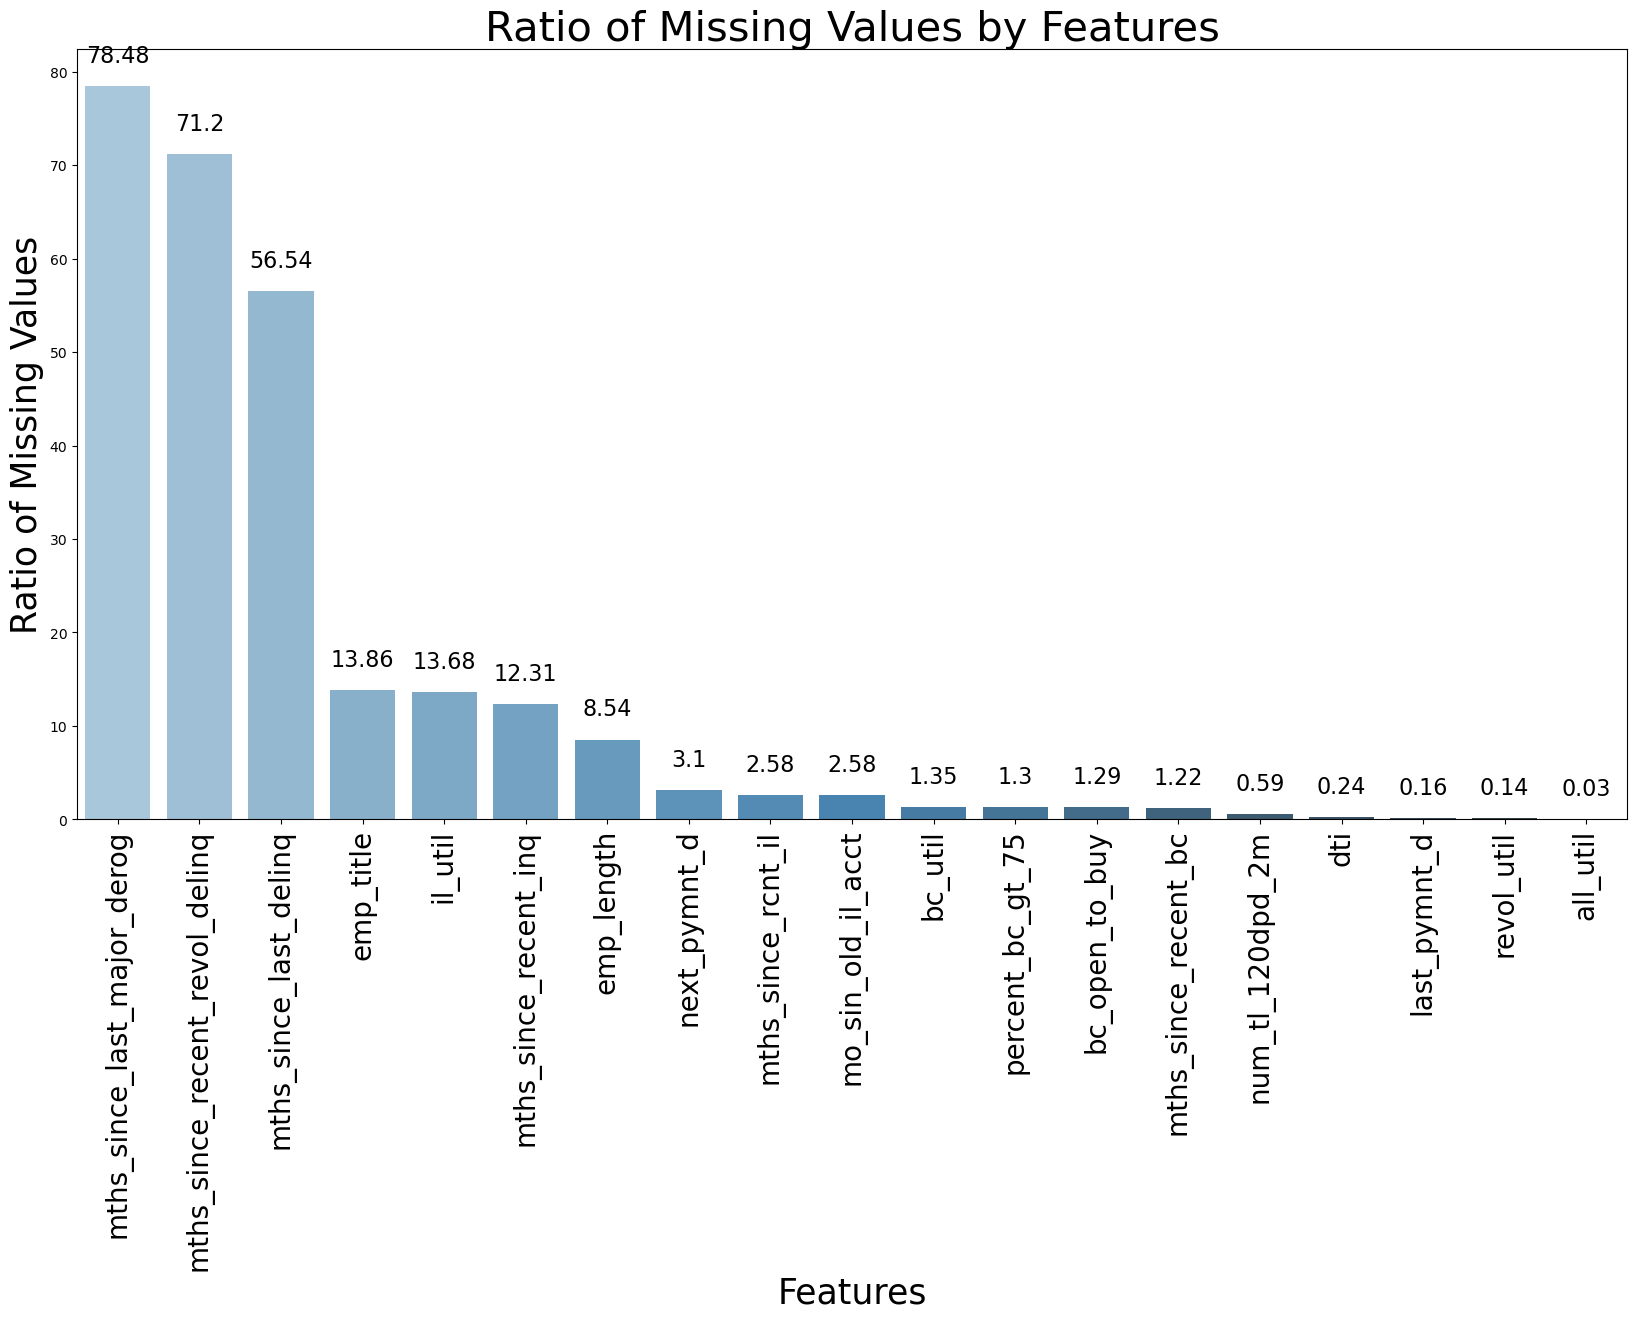

In [ ]:

nar = sns.barplot(x=df_na.index, y=df_na['NA_Ratio'], orient='v', palette="Blues_d")
ax.set_xticklabels(df_na.index, rotation=90, fontsize=20)
ax.set_ylabel('Ratio of Missing Values', fontsize=25)
ax.set_xlabel('Features', fontsize=25)
ax.set_title('Ratio of Missing Values by Features', fontsize=30)
for loc, value in zip(ax.patches, df_na.NA_Ratio):
    ax.text(loc.get_x() + loc.get_width() / 2, loc.get_height() + 2, round(value, 2), ha='center', va='bottom', fontsize=16)
plt.show()

## 3.2缺失值删除

In [32]:
null_index = list(na_ratio[na_ratio['NA_Ratio'] >= 56].index)
print("需要删除的缺失值较多的列为:", null_index)

需要删除的缺失值较多的列为: ['member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'sett

In [33]:
# 使用copy()函数拷贝一份原数据的副本
dataset_copy = dataset.copy()
# 使用drop()函数直接删除先前得到的要删除的列
# axis=0时为删除行；axis=1为删除列。inplaces是否替换原来的dataframe
dataset_copy.drop(null_index, axis=1, inplace=True)
# 打印此时数据的大小
dataset_copy.shape

(143035, 107)

## 3.3简单填补

In [34]:
dataset_copy.to_csv("D:/output/copy.csv",index = False)

In [35]:
less_null_index = list(na_ratio[(na_ratio['NA_Ratio'] <= 56) & (na_ratio['NA_Ratio'] >= 8)].index)
print("需要简单填补的缺失值的列为:", less_null_index)

需要简单填补的缺失值的列为: ['emp_title', 'emp_length', 'il_util', 'mths_since_recent_inq']


In [36]:
dataset_copy[less_null_index].head(5)

,emp_title,emp_length,il_util,mths_since_recent_inq
0,Teacher,10+ years,NaN,22.0
1,Remodel expert,3 years,63.0,16.0
2,Operations Supervisor,3 years,95.0,8.0
3,NaN,< 1 year,52.0,5.0
4,Street sweeper,6 years,NaN,9.0


In [37]:
dataset_copy[less_null_index].dtypes

emp_title                 object
emp_length                object
il_util                  float64
mths_since_recent_inq    float64
dtype: object

### 3.3.1固定值填补

In [38]:
dataset_copy['emp_title'].fillna("workless", inplace=True)
dataset_copy['emp_title'].isnull().sum()

0

### 3.3.2中位数填补

In [39]:
# \d是匹配数字字符[0-9]，+匹配一个或多个，放在一起是匹配一个或多个数字字符
pattern = re.compile(r'\d+')
# 初始化一个列表
result = []
# 因为有缺失值的存在，会使得正则表达式失败,使程序报错退出，故而引入异常检测来规避缺失值
for i in list(range(0, len(dataset_copy['emp_length']))):
    try:
        replace_number = int(pattern.findall(dataset_copy['emp_length'][i])[0])
        result.append(replace_number)
        # 此处可以直接对原DataFrame的数据进行替换，若此处进行替换操作，会因为DataFrame拷贝操作而导致耗时极长
    except:
        pass

In [40]:
print("列表长度", len(result))
print("非缺失值的数量", dataset_copy['emp_length'].notnull().sum())

列表长度 130814
非缺失值的数量 130814


In [41]:
# 创建一个dataframe，用来存放之前正则表达式得到的数字
df = pd.DataFrame()
df['result'] = result
# 使用median函数来求得该列的中位数
df.median()

result    5.0
dtype: float64

In [42]:
# 创建要填补的字符串“5 years”
replace_str = str(int(df.median())) + " years"
# 打印字符串
print(replace_str)

5 years


In [43]:
# 使用fillna()函数来填补缺失值
dataset_copy['emp_length'].fillna(replace_str, inplace=True)
# 查看本列的缺失值数量
dataset_copy['emp_length'].isnull().sum()

0

### 3.3.3均值填补

In [45]:
dataset_copy['il_util'].mean()

69.15476942514213

In [46]:
# 使用均值填补贷款帐户的当前总余额占信用限额的比例
dataset_copy['il_util'].fillna(dataset_copy['il_util'].mean(), inplace=True)
# 查看本列的缺失值数量
dataset_copy['il_util'].isnull().sum()

0

### 3.3.4众数填补

In [71]:
dataset = pd.read_csv("D:/input/moreMode.csv", encoding="UTF-8",low_memory=False)
dataset.head(10)
dataset["code"].mode()

0    1
1    2
2    3
Name: code, dtype: int64

In [72]:
dataset_copy['mths_since_recent_inq'].mode()

0    1.0
Name: mths_since_recent_inq, dtype: float64

In [73]:
# 距离上一次调查的时间用众数填补
dataset_copy['mths_since_recent_inq'].fillna(dataset_copy['mths_since_recent_inq'].mode()[0], inplace=True)
# 查看本列的缺失值数量
print(dataset_copy['mths_since_recent_inq'].isnull().sum())

0


### 3.3.5使用字典进行快速填补

In [ ]:
dataset_copy_2 = dataset.copy()

## 3.4向前向后与插值法进行缺失值的填补
### 3.4.1属性查看

In [58]:
less_null_index = list(na_ratio[(na_ratio['NA_Ratio'] <= 4) & (na_ratio['NA_Ratio'] >= 2.5)].index)
print("需要填补的缺失值的列为:", less_null_index)

需要填补的缺失值的列为: ['next_pymnt_d', 'mths_since_rcnt_il', 'mo_sin_old_il_acct']


In [59]:
# 查看此三列前五行的信息
print(dataset_copy[less_null_index].head(5))

  next_pymnt_d  mths_since_rcnt_il  mo_sin_old_il_acct
0       19-Dec                35.0               171.0
1       19-Dec                16.0               163.0
2       19-Dec                48.0               108.0
3       19-Dec                 5.0               176.0
4       19-Dec                20.0               108.0


In [60]:
print(dataset_copy[less_null_index].dtypes)

next_pymnt_d           object
mths_since_rcnt_il    float64
mo_sin_old_il_acct    float64
dtype: object


### 3.4.2后值向前填补

In [61]:
dataset_copy['next_pymnt_d'][490:510]

490    19-Dec
491       NaN
492    19-Dec
493    19-Dec
494    19-Dec
495    19-Dec
496    19-Dec
497    19-Dec
498    19-Dec
499    19-Dec
500    19-Dec
501       NaN
502    19-Dec
503    19-Dec
504    19-Dec
505    19-Dec
506    19-Dec
507    19-Dec
508    19-Dec
509    19-Dec
Name: next_pymnt_d, dtype: object

In [62]:
dataset_copy['next_pymnt_d'] = dataset_copy['next_pymnt_d'].fillna(method="bfill")
print(dataset_copy['next_pymnt_d'][250:265])

250    19-Dec
251    19-Dec
252    19-Dec
253    19-Dec
254    19-Dec
255    19-Dec
256    19-Dec
257    19-Dec
258    19-Dec
259    19-Dec
260    19-Dec
261    19-Dec
262    19-Dec
263    19-Dec
264    19-Dec
Name: next_pymnt_d, dtype: object


In [63]:
print(dataset_copy['next_pymnt_d'][490:510])

490    19-Dec
491    19-Dec
492    19-Dec
493    19-Dec
494    19-Dec
495    19-Dec
496    19-Dec
497    19-Dec
498    19-Dec
499    19-Dec
500    19-Dec
501    19-Dec
502    19-Dec
503    19-Dec
504    19-Dec
505    19-Dec
506    19-Dec
507    19-Dec
508    19-Dec
509    19-Dec
Name: next_pymnt_d, dtype: object


### 3.4.3前值向后填补

In [64]:
dataset_copy['mths_since_rcnt_il'][dataset_copy['mths_since_rcnt_il'].isnull()].head(10)

6     NaN
66    NaN
70    NaN
138   NaN
151   NaN
156   NaN
163   NaN
189   NaN
199   NaN
211   NaN
Name: mths_since_rcnt_il, dtype: float64

In [65]:
# 原数据
print(dataset_copy['mo_sin_old_il_acct'][150:165])

150    108.0
151      NaN
152     83.0
153     45.0
154    122.0
155    103.0
156      NaN
157    100.0
158    141.0
159    101.0
160    121.0
161    172.0
162    170.0
163      NaN
164    109.0
Name: mo_sin_old_il_acct, dtype: float64


In [66]:
# 进行填补，对比
dataset_copy['mths_since_rcnt_il'] = dataset_copy['mths_since_rcnt_il'].fillna(method="pad")
print(dataset_copy['mths_since_rcnt_il'][150:165])

150    10.0
151    10.0
152    83.0
153    16.0
154     2.0
155     3.0
156     3.0
157     1.0
158    14.0
159    19.0
160     2.0
161     3.0
162     3.0
163     3.0
164    16.0
Name: mths_since_rcnt_il, dtype: float64


### 3.4.4插值填补

#### 3.4.4.1线性插值

In [67]:
dataset_copy['mo_sin_old_il_acct'][dataset_copy['mo_sin_old_il_acct'].isnull()].head(10)

6     NaN
66    NaN
70    NaN
138   NaN
151   NaN
156   NaN
163   NaN
189   NaN
199   NaN
211   NaN
Name: mo_sin_old_il_acct, dtype: float64

In [68]:
dataset_copy['mo_sin_old_il_acct'][150:165]
# 进行线性插值，对比数据
dataset_copy['mo_sin_old_il_acct'] = dataset_copy['mo_sin_old_il_acct'].interpolate()
# 打印150-165行填充后此列的值
print(dataset_copy['mo_sin_old_il_acct'][150:165])

150    108.0
151     95.5
152     83.0
153     45.0
154    122.0
155    103.0
156    101.5
157    100.0
158    141.0
159    101.0
160    121.0
161    172.0
162    170.0
163    139.5
164    109.0
Name: mo_sin_old_il_acct, dtype: float64


In [69]:
# 选取部分列作为备选，方便接下来进行处理
null_index = list(na_ratio[(na_ratio['NA_Ratio'] >= 1) & (na_ratio['NA_Ratio'] < 2.5)].index)
print("缺失值列为:", null_index)

缺失值列为: ['bc_open_to_buy', 'bc_util', 'mths_since_recent_bc', 'percent_bc_gt_75']


#### 3.4.4.2多项式插值

In [70]:
dataset_copy['bc_open_to_buy'][485:500]
dataset_copy['bc_open_to_buy'].interpolate(method = "polynomial", order = 2, inplace=True)
dataset_copy['bc_open_to_buy'][485:500]

485    10343.000000
486     9139.000000
487     8139.000000
488    10662.000000
489    24986.611923
490    28538.000000
491     5220.000000
492     1333.578571
493     5966.000000
494     1335.000000
495     2653.000000
496    48263.000000
497    24618.000000
498     6942.000000
499    15630.000000
Name: bc_open_to_buy, dtype: float64

#### 3.4.4.3样条插值

In [74]:
dataset_copy['bc_util'][485:500]

485    53.0
486    39.5
487    88.4
488    39.1
489     NaN
490    54.2
491    75.3
492     NaN
493    78.1
494    73.8
495    58.5
496    24.0
497    50.0
498    45.3
499    32.5
Name: bc_util, dtype: float64

In [ ]:
dataset_copy['bc_util'].interpolate(method="spline",order=3,inplace=True)
dataset_copy['bc_util'][485:500]

485    53.000000
486    39.500000
487    88.400000
488    39.100000
489    26.047041
490    54.200000
491    75.300000
492    79.569911
493    78.100000
494    73.800000
495    58.500000
496    24.000000
497    50.000000
498    45.300000
499    32.500000
Name: bc_util, dtype: float64

In [ ]:
# 剩下的所有列的缺失值进行简单的向前填补处理
dataset_copy.fillna(method="bfill", inplace=True)

In [ ]:
dataset_copy.isnull().sum().sum()

0

# 4异常值处理

In [ ]:
dataset_copy['mths_since_rcnt_il'].describe()

count    143035.000000
mean         19.007061
std          23.287769
min           0.000000
25%           6.000000
50%          12.000000
75%          22.000000
max         454.000000
Name: mths_since_rcnt_il, dtype: float64

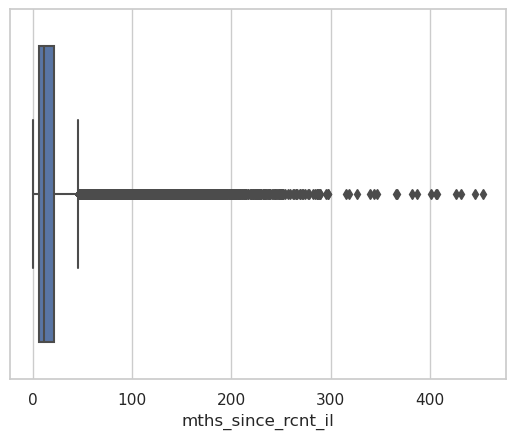

In [ ]:
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(x='mths_since_rcnt_il', data=dataset_copy)
plt.show()

In [ ]:
dataset_copy['mths_since_rcnt_il'][dataset_copy['mths_since_rcnt_il']>300]

12549     431.0
17363     382.0
21074     327.0
21592     401.0
32163     445.0
51196     406.0
65111     426.0
69109     316.0
69876     367.0
81846     340.0
82736     344.0
87536     347.0
99514     366.0
107050    387.0
111815    454.0
123497    407.0
129483    319.0
Name: mths_since_rcnt_il, dtype: float64

In [ ]:
print("删除异常值之前的行数",len(dataset_copy['mths_since_rcnt_il']))
dataset_copy.drop(list(dataset_copy['mths_since_rcnt_il'][dataset_copy['mths_since_rcnt_il']>300].index),axis=0,inplace=True)
print("删除异常值之后的行数",len(dataset_copy['mths_since_rcnt_il']))

删除异常值之前的行数 143035
删除异常值之后的行数 143018


In [ ]:
dataset_copy.reset_index(inplace=True)
dataset_copy.drop('index',axis=1,inplace=True)
dataset_copy[dataset_copy.duplicated]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag


# 5重复值处理

In [ ]:
random_number=np.random.randint(0,len(dataset_copy['loan_amnt']))
print("随机选择的行为：",random_number)

随机选择的行为： 72661


In [ ]:
print("粘帖前的行数为：",len(dataset_copy['loan_amnt']))
duplicated_row=dataset_copy.iloc[random_number]
dataset_copy.loc[len(dataset_copy['loan_amnt'])]=duplicated_row
print("粘帖后的行数为：",len(dataset_copy['loan_amnt']))

粘帖前的行数为： 143018
粘帖后的行数为： 143019


In [ ]:
dataset_copy[dataset_copy.duplicated()]

In [ ]:
dataset_copy.drop_duplicates(keep='first',inplace=True)
dataset_copy[dataset_copy.duplicated()]

In [ ]:
dataset_copy['loan_amnt'].head(10)

0    12000
1    20000
2    18000
3    10000
4     7000
5    24000
6     4000
7    22975
8     4000
9    34025
Name: loan_amnt, dtype: int64

In [ ]:
std_scale=preprocessing.StandardScaler().fit(dataset_copy[['loan_amnt']])
np_std=std_scale.transform(dataset_copy[['loan_amnt']])
dataset_copy[['loan_amnt']]=np_std
dataset_copy['loan_amnt'].head(10)

0   -0.423522
1    0.349594
2    0.156315
3   -0.616800
4   -0.906719
5    0.736152
6   -1.196637
7    0.637097
8   -1.196637
9    1.704963
Name: loan_amnt, dtype: float64

# 6数据标准化
## 6.1 Z-score标准化

In [ ]:
dataset_copy['loan_amnt'].head(10)

0    12000
1    20000
2    18000
3    10000
4     7000
5    24000
6     4000
7    22975
8     4000
9    34025
Name: loan_amnt, dtype: int64

In [ ]:
dataset_copy['loan_amnt'].head(10)

In [ ]:
# z-score标准化，适配数据集获取参数
std_scale = preprocessing.StandardScaler().fit(dataset_copy[['loan_amnt']])
# 进行标准化，得到标准化的数据
np_std = std_scale.transform(dataset_copy[['loan_amnt']])
# 将标准化后的数据加到dataset_copy中，替换初始数据
dataset_copy[['loan_amnt']] = np_std
# 查看此列标准化后的数据
dataset_copy['loan_amnt'].head(10)

## 6.2 Min-Max标准化（0-1标准化）

In [ ]:
dataset_copy['funded_amnt'].head(10)

0    12000
1    20000
2    18000
3    10000
4     7000
5    24000
6     4000
7    22975
8     4000
9    34025
Name: funded_amnt, dtype: int64

In [ ]:
minmax_scale=preprocessing.MinMaxScaler().fit(dataset_copy[['funded_amnt']])
np_minmax=minmax_scale.transform(dataset_copy[['funded_amnt']])
dataset_copy[['funded_amnt']]=np_minmax
dataset_copy['funded_amnt'].head(10)

0    0.282051
1    0.487179
2    0.435897
3    0.230769
4    0.153846
5    0.589744
6    0.076923
7    0.563462
8    0.076923
9    0.846795
Name: funded_amnt, dtype: float64

# 7数据编码
## 7.1数字编码

In [ ]:
dataset_copy['home_ownership'].head(10)

0        RENT
1        RENT
2        RENT
3        RENT
4        RENT
5    MORTGAGE
6        RENT
7        RENT
8        RENT
9         OWN
Name: home_ownership, dtype: object

In [ ]:
col_dicts={'home_ownership':{'MORTGAGE':0,
                            'OWN':1,
                            'RENT':2,
                            'others':3}}
dataset_copy['home_ownership']=dataset_copy['home_ownership'].map(col_dicts['home_ownership'])

In [ ]:
dataset_copy['home_ownership'].head(10)

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
5    0.0
6    2.0
7    2.0
8    2.0
9    1.0
Name: home_ownership, dtype: float64

## 7.2 one-hot编码

In [ ]:
dataset_copy['delinq_2yrs'].head(10)

0    1
1    0
2    0
3    0
4    2
5    3
6    0
7    0
8    0
9    0
Name: delinq_2yrs, dtype: int64

In [ ]:
targets = preprocessing.OneHotEncoder(sparse_output=False).fit_transform(dataset_copy[['delinq_2yrs']])
print(targets[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# 8数据保存
## 8.1使用python原生方法

In [ ]:
fw = open("D:/output/finish.csv","w")

In [ ]:
columns=list(dataset_copy.columns)
columns_write=""
for column in columns:
    columns_write=columns_write+","+column
columns_write=columns_write[1:]
print(columns_write)
fw.write(columns_write+"\n")

id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_

1487

In [ ]:
for i in range(0,len(dataset_copy['loan_amnt'])):
    str_write=""
    for column in columns:
        str_write=str_write+","+str(dataset_copy[column][i])
    str_write=str_write[1:]
    if i<5:
        print(str_write)
    fw.write(str_write+"\n")
    fw.close()

158303403,-0.4235215443721572,0.282051282051282,12000, 36 months,8.19%,377.09,A,A4,Teacher,10+ years,2.0,84000.0,Source Verified,19-Sep,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=158303403,debt_consolidation,Debt consolidation,937xx,CA,10.86,1,Jan-96,680,684,0,5,0,22489,71.60%,15,w,11713.0,11713.0,371.63,371.63,287.0,84.63,0.0,0.0,0,19-Nov,377.09,19-Dec,19-Nov,699,695,0,1,Individual,0,0,51361,0,1,0,0,35.0,28872,69.15476942514213,0,0,5724,72.0,31400,0,3,0,0,10272.0,8440.0,48.5,0,0,171.0,284,44,35,0,44.0,22.0,0,2,3,3,4,10,4,5,3,5,0.0,0,0,0,93.3,33.3,0,0,77713,51361,16400,46313,N,N
158628181,0.34959412852555244,0.4871794871794871,20000, 36 months,8.81%,634.23,A,A5,Remodel expert,3 years,2.0,44000.0,Not Verified,19-Sep,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=158628181,debt_consolidation,Debt consolidation,891xx,NV,13.72,0,6-Feb,745,749,0,6,0,5435,21.80%,12,w,18947.67,18947.67,1258.67,1258.67,1052.33,206.34,0.0,0.0,0,19-Nov,634.23,19-Dec,19

## 8.2使用pandas中的函数

In [ ]:
dataset_copy.to_csv("D:/output/finish2.csv",index = False)